In [1]:
import numpy as np
import matplotlib.pyplot as plt

The inviscid Burgers' equation can be written as

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}=0, \quad u(x,0)=f(x)
$$

The general (implicit) solution of this equation is given by 

$$
u(x,t) = f(x-ut)
$$

Explicit solutions are only know when $f$ is linear, i.e. $f(x)=ax+b,$ in which case the solution is

$$
u(x,t) = \frac{ax+b}{at+1}
$$

In [2]:
def get_explicit_solution(x, t, a, b):
    sol = (a*x + b) / (a*t + 1)
    return sol

def plot_explicit_solution(x, t, a, b):
    fig, ax = plt.subplots(figsize=(10,7))
    try:
        for t_i in t:
            sol = get_explicit_solution(x, t_i, a, b)
            ax.plot(x, sol, label=f"t={t_i:.3f}")
            ax.set_xlabel("$x$")
            ax.set_ylabel("$u(x,t)$")
            ax.set_title(f"Analytical solutions to Burgers' equation (f={a}x+{b})")
        ax.legend()
    except:
        sol = get_explicit_solution(x, t, a, b)
        ax.plot(x, sol)
        ax.set_xlabel("$x$")
        ax.set_ylabel("$u(x,t)$")
        ax.set_title(f"Analytical solution to Burgers' equation at t={t} (f={a}x+{b})")
    plt.show()

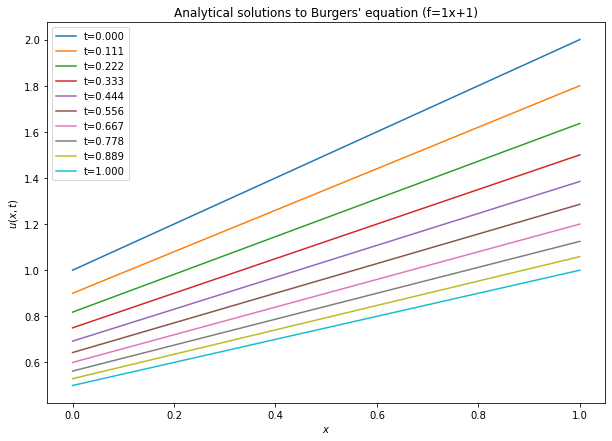

In [15]:
# Specify parameters
x = np.linspace(0,1,100)
t = np.linspace(0,1,10)
a = 1
b = 1

# Plot the solutions
plot_explicit_solution(x, t, a, b)

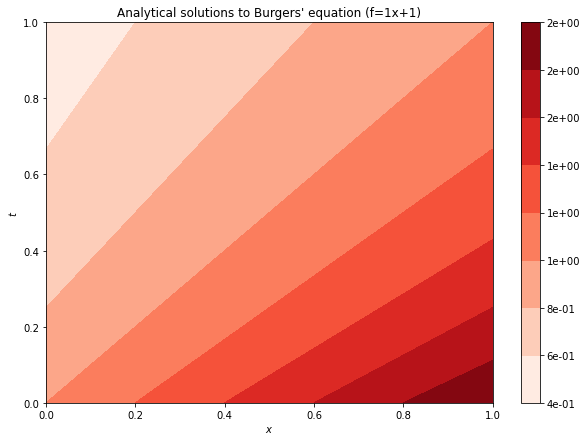

In [14]:
# Create PDE contour plot
x = np.linspace(0,1,32)
t = np.linspace(0,1,32)
a = 1
b = 1
xx, tt = np.meshgrid(x, t)
sol = get_explicit_solution(xx, tt, a, b)
fig, ax = plt.subplots(figsize=(10,7))
cf = ax.contourf(xx, tt, sol, cmap="Reds")
cb = fig.colorbar(cf, format='%.0e', ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_title(f"Analytical solutions to Burgers' equation (f={a}x+{b})")
plt.show()

In [20]:
from sympy import *

In [21]:
x = symbols('x')
y = Function('y')
deq = diff(y(x),x)*(2*y(x)*x**2 - cos(y(x))) + (1/x + 2*y(x)**2*x)

# this leads to an error
# ysoln = dsolve(deq, y(x), ics={y(0): pi})

# so we do it our own way
ysoln = dsolve(deq, y(x))
C1 = solve(ysoln.subs(x, 1).subs(y(1), pi), 'C1')[0]
ysoln = ysoln.subs('C1', C1)
print(ysoln)

Eq(x**2*y(x)**2 + log(x) - sin(y(x)), pi**2)


In [ ]:
#u_dot + u^2 = f(t)